In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Trends
from pytrends.request import TrendReq

# Time
import time
from requests.exceptions import ReadTimeout
from datetime import timedelta, date, datetime
from dateutil.relativedelta import relativedelta

# Accessing the API
import requests
import json
import yfinance as yf
from yahoo_fin.stock_info import get_data
from pycoingecko import CoinGeckoAPI

In [2]:
df1 = pd.read_csv('hist.csv')
df1

,id,timestamp,price,market_cap,total_volume
0,bitcoin,2021-06-26 00:00:00,31943.136468,5.987030e+11,3.863525e+10
1,bitcoin,2021-06-27 00:00:00,32023.973902,6.002353e+11,3.687311e+10
2,bitcoin,2021-06-28 00:00:00,34607.293274,6.492621e+11,3.433545e+10
3,bitcoin,2021-06-29 00:00:00,34556.842127,6.477412e+11,3.245380e+10
4,bitcoin,2021-06-30 00:00:00,35968.993668,6.742313e+11,3.512126e+10
...,...,...,...,...,...
67444,pancakeswap-token,2023-06-22 00:00:00,1.434245,2.960873e+08,3.663429e+07
67445,pancakeswap-token,2023-06-23 00:00:00,1.407047,2.905783e+08,3.488983e+07
67446,pancakeswap-token,2023-06-24 00:00:00,1.435052,2.957877e+08,3.151829e+07
67447,pancakeswap-token,2023-06-25 00:00:00,1.422557,3.030034e+08,3.110804e+07


In [3]:
df2 = pd.read_csv('ohlc.csv')
df2

,timestamp,open,high,low,close,id
0,2022-12-28,16777.90,16795.72,16647.60,16701.28,bitcoin
1,2022-12-29,16699.69,16717.05,16514.47,16515.82,bitcoin
2,2022-12-30,16541.38,16659.64,16527.81,16624.52,bitcoin
3,2022-12-31,16646.17,16646.17,16464.04,16589.02,bitcoin
4,2023-01-01,16609.13,16611.61,16521.82,16521.82,bitcoin
...,...,...,...,...,...,...
17770,2023-06-22,1.41,1.44,1.40,1.43,pancakeswap-token
17771,2023-06-23,1.43,1.47,1.41,1.41,pancakeswap-token
17772,2023-06-24,1.41,1.45,1.41,1.44,pancakeswap-token
17773,2023-06-25,1.44,1.45,1.40,1.42,pancakeswap-token


### Changing Datetime

In [4]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1['timestamp'] = df1['timestamp'].dt.date
df1

,id,timestamp,price,market_cap,total_volume
0,bitcoin,2021-06-26,31943.136468,5.987030e+11,3.863525e+10
1,bitcoin,2021-06-27,32023.973902,6.002353e+11,3.687311e+10
2,bitcoin,2021-06-28,34607.293274,6.492621e+11,3.433545e+10
3,bitcoin,2021-06-29,34556.842127,6.477412e+11,3.245380e+10
4,bitcoin,2021-06-30,35968.993668,6.742313e+11,3.512126e+10
...,...,...,...,...,...
67444,pancakeswap-token,2023-06-22,1.434245,2.960873e+08,3.663429e+07
67445,pancakeswap-token,2023-06-23,1.407047,2.905783e+08,3.488983e+07
67446,pancakeswap-token,2023-06-24,1.435052,2.957877e+08,3.151829e+07
67447,pancakeswap-token,2023-06-25,1.422557,3.030034e+08,3.110804e+07


### Calculating the Daily Log Return

In [5]:
# Group each crypto and calculate the log return
df1['log_ret'] = df1.groupby('id')['price'].apply(lambda x: np.log(x) - np.log(x.shift(1)))
df1

C:\Users\validol\AppData\Local\Temp\ipykernel_6964\281102812.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df1['log_ret'] = df1.groupby('id')['price'].apply(lambda x: np.log(x) - np.log(x.shift(1)))


,id,timestamp,price,market_cap,total_volume,log_ret
0,bitcoin,2021-06-26,31943.136468,5.987030e+11,3.863525e+10,NaN
1,bitcoin,2021-06-27,32023.973902,6.002353e+11,3.687311e+10,0.002527
2,bitcoin,2021-06-28,34607.293274,6.492621e+11,3.433545e+10,0.077580
3,bitcoin,2021-06-29,34556.842127,6.477412e+11,3.245380e+10,-0.001459
4,bitcoin,2021-06-30,35968.993668,6.742313e+11,3.512126e+10,0.040052
...,...,...,...,...,...,...
67444,pancakeswap-token,2023-06-22,1.434245,2.960873e+08,3.663429e+07,0.018964
67445,pancakeswap-token,2023-06-23,1.407047,2.905783e+08,3.488983e+07,-0.019146
67446,pancakeswap-token,2023-06-24,1.435052,2.957877e+08,3.151829e+07,0.019708
67447,pancakeswap-token,2023-06-25,1.422557,3.030034e+08,3.110804e+07,-0.008745


### Plotting for the Crash Definition

Text(0, 0.5, 'Frequency')

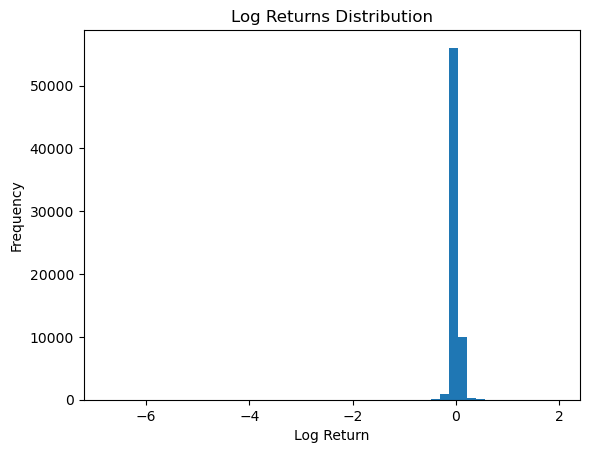

In [6]:
plt.hist(df1['log_ret'],bins=50)
plt.title('Log Returns Distribution')
plt.xlabel('Log Return')
plt.ylabel('Frequency')

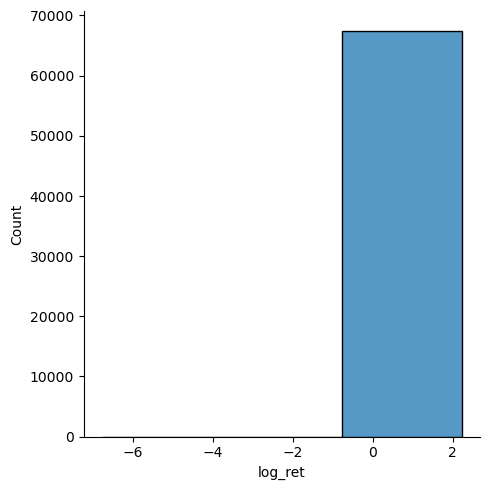

In [7]:
sns.displot(df1,x='log_ret', binwidth=3)

### CSAD Calculus

In [8]:
df1 = df1.drop_duplicates(subset=['timestamp', 'id'], keep='first')
df_pivot = df1.pivot(index='timestamp', columns='id', values='log_ret')
csad = df_pivot.sub(df_pivot.mean(axis=1), axis=0).abs().mean(axis=1).to_frame()

# Rename the column to 'csad'
csad.columns = ['csad']
csad.reset_index(inplace=True)
df = pd.merge(df1, csad, on='timestamp', how='left')
df

,id,timestamp,price,market_cap,total_volume,log_ret,csad
0,bitcoin,2021-06-26,31943.136468,5.987030e+11,3.863525e+10,NaN,NaN
1,bitcoin,2021-06-27,32023.973902,6.002353e+11,3.687311e+10,0.002527,0.026520
2,bitcoin,2021-06-28,34607.293274,6.492621e+11,3.433545e+10,0.077580,0.027467
3,bitcoin,2021-06-29,34556.842127,6.477412e+11,3.245380e+10,-0.001459,0.033799
4,bitcoin,2021-06-30,35968.993668,6.742313e+11,3.512126e+10,0.040052,0.031317
...,...,...,...,...,...,...,...
67344,pancakeswap-token,2023-06-21,1.407302,2.895687e+08,2.380494e+07,0.009241,0.022358
67345,pancakeswap-token,2023-06-22,1.434245,2.960873e+08,3.663429e+07,0.018964,0.024535
67346,pancakeswap-token,2023-06-23,1.407047,2.905783e+08,3.488983e+07,-0.019146,0.017733
67347,pancakeswap-token,2023-06-24,1.435052,2.957877e+08,3.151829e+07,0.019708,0.025339


In [9]:
print(df.head())

        id   timestamp         price    market_cap  total_volume   log_ret  \
0  bitcoin  2021-06-26  31943.136468  5.987030e+11  3.863525e+10       NaN   
1  bitcoin  2021-06-27  32023.973902  6.002353e+11  3.687311e+10  0.002527   
2  bitcoin  2021-06-28  34607.293274  6.492621e+11  3.433545e+10  0.077580   
3  bitcoin  2021-06-29  34556.842127  6.477412e+11  3.245380e+10 -0.001459   
4  bitcoin  2021-06-30  35968.993668  6.742313e+11  3.512126e+10  0.040052   

       csad  
0       NaN  
1  0.026520  
2  0.027467  
3  0.033799  
4  0.031317  


In [10]:
df.id.value_counts()

bitcoin               730
kucoin-shares         730
injective-protocol    730
flow                  730
gatechain-token       730
                     ... 
aptos                 250
frax-ether            205
arbitrum               95
pepe                   69
sui                    54
Name: id, Length: 100, dtype: int64

### FEARS Index

In [11]:
# trends = TrendReq(hl='en-US')
# key_words = ['Volatility', 'Liquidity', 'Bitcoin','Collapse','Sell']
# key_words2 = ['Crash','Risks','Bubble','Sentiment','Crisis']

In [12]:
#  # Handling the ReadTimeout error
# for _ in range(5):
#     try:
#         trends.build_payload(key_words2,timeframe='2021-06-26 2023-06-25')
#         google_df2 = trends.interest_over_time()
#         google_df2
#         break
#     except ReadTimeout:
#         print(f'ReadTimeout encountered. Retrying...')
#         time.sleep(10) # 10 secs
# else:
#     print(f'Failed to retrieve after 5 attempts')

# google_df2

In [13]:
#  # Handling the ReadTimeout error
# for _ in range(5):
#     try:
#         trends.build_payload(key_words,timeframe='2021-06-26 2023-06-25')
#         google_df = trends.interest_over_time()
#         google_df
#         break
#     except ReadTimeout:
#         print(f'ReadTimeout encountered. Retrying...')
#         time.sleep(10) # 10 secs
# else:
#     print(f'Failed to retrieve after 5 attempts')

# google_df

In [14]:
# # mergin google dfs
# google_dfs = [google_df,google_df2]
# df_g = pd.merge(google_df,google_df2,on='date')
# df_g.reset_index(inplace=True)
# df_g['timestamp'] = df_g['date']
# df_g['timestamp'] = df_g['timestamp'].astype(str)
# df_g.drop('date',inplace=True, axis=1)
# df_g

#### FEARS keywords using GPT's solution

In [15]:
start_date = datetime(2021, 6, 26)
end_date = datetime(2023, 6, 25)

trends = TrendReq(hl='en-US')
key_words = ['Volatility', 'Liquidity', 'Bitcoin','Collapse','Sell']
key_words2 = ['Crash','Risks','Bubble','Sentiment','Crisis']

def fetch_data_for_period(start_date, end_date, kw_list):
    for _ in range(5):
        try:
            trends.build_payload(kw_list, timeframe=f'{start_date.strftime("%Y-%m-%d")} {end_date.strftime("%Y-%m-%d")}')
            df = trends.interest_over_time()
            return df
        except ReadTimeout:
            print(f'ReadTimeout encountered. Retrying...')
            time.sleep(10) # 10 secs
    print(f'Failed to retrieve after 5 attempts')
    return pd.DataFrame()

dfs1 = []
dfs2 = []

curr_date = start_date

while curr_date < end_date:
    next_date = curr_date + relativedelta(months=3)
    dfs1.append(fetch_data_for_period(curr_date, min(next_date, end_date), key_words))
    dfs2.append(fetch_data_for_period(curr_date, min(next_date, end_date), key_words2))
    curr_date = next_date

google_df = pd.concat(dfs1)
google_df2 = pd.concat(dfs2)

# merging google dfs
df_g = pd.merge(google_df,google_df2,on='date', how='outer')
df_g.reset_index(inplace=True)
df_g['timestamp'] = df_g['date']
df_g['timestamp'] = df_g['timestamp'].astype(str)
df_g.drop('date',inplace=True, axis=1)
df_g

,Volatility,Liquidity,Bitcoin,Collapse,Sell,isPartial_x,Crash,Risks,Bubble,Sentiment,Crisis,isPartial_y,timestamp
0,0,0,73,83,32,False,58,4,48,1,15,False,2021-06-26
1,0,1,68,62,33,False,100,4,44,2,14,False,2021-06-27
2,1,1,70,46,32,False,84,5,42,2,17,False,2021-06-28
3,1,1,73,36,32,False,58,5,40,2,16,False,2021-06-29
4,1,1,64,31,31,False,59,6,41,2,17,False,2021-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,1,1,79,6,57,False,61,6,44,2,21,False,2023-06-21
747,1,2,79,6,57,False,60,7,46,2,22,False,2023-06-22
748,1,1,77,6,58,False,54,6,48,2,21,False,2023-06-23
749,1,1,69,6,60,False,53,5,47,2,19,False,2023-06-24


In [16]:
print(df_g.head())

   Volatility  Liquidity  Bitcoin  Collapse  Sell  isPartial_x  Crash  Risks  \
0           0          0       73        83    32        False     58      4   
1           0          1       68        62    33        False    100      4   
2           1          1       70        46    32        False     84      5   
3           1          1       73        36    32        False     58      5   
4           1          1       64        31    31        False     59      6   

   Bubble  Sentiment  Crisis  isPartial_y   timestamp  
0      48          1      15        False  2021-06-26  
1      44          2      14        False  2021-06-27  
2      42          2      17        False  2021-06-28  
3      40          2      16        False  2021-06-29  
4      41          2      17        False  2021-06-30  


In [17]:
#! BUG occurs here
# Here is the SOLUTION
df_g_selected = df_g[['timestamp', 'Volatility', 'Liquidity', 'Bitcoin', 'Collapse', 'Sell', 'Crash', 'Risks', 'Bubble', 'Sentiment', 'Crisis']]
df['timestamp'] = pd.to_datetime(df['timestamp'])
df_g_selected['timestamp'] = pd.to_datetime(df_g_selected['timestamp'])
df_g_selected = df_g_selected.drop_duplicates(subset='timestamp',keep='first')
# mergin with the og df
df = df.merge(df_g_selected,on='timestamp', how='left')
df.fillna(0,inplace=True)
df.drop_duplicates(inplace=True)
df

C:\Users\validol\AppData\Local\Temp\ipykernel_6964\1385685433.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_g_selected['timestamp'] = pd.to_datetime(df_g_selected['timestamp'])


,id,timestamp,price,market_cap,total_volume,log_ret,csad,Volatility,Liquidity,Bitcoin,Collapse,Sell,Crash,Risks,Bubble,Sentiment,Crisis
0,bitcoin,2021-06-26,31943.136468,5.987030e+11,3.863525e+10,0.000000,0.000000,0,0,73,83,32,58,4,48,1,15
1,bitcoin,2021-06-27,32023.973902,6.002353e+11,3.687311e+10,0.002527,0.026520,0,1,68,62,33,100,4,44,2,14
2,bitcoin,2021-06-28,34607.293274,6.492621e+11,3.433545e+10,0.077580,0.027467,1,1,70,46,32,84,5,42,2,17
3,bitcoin,2021-06-29,34556.842127,6.477412e+11,3.245380e+10,-0.001459,0.033799,1,1,73,36,32,58,5,40,2,16
4,bitcoin,2021-06-30,35968.993668,6.742313e+11,3.512126e+10,0.040052,0.031317,1,1,64,31,31,59,6,41,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67344,pancakeswap-token,2023-06-21,1.407302,2.895687e+08,2.380494e+07,0.009241,0.022358,1,1,79,6,57,61,6,44,2,21
67345,pancakeswap-token,2023-06-22,1.434245,2.960873e+08,3.663429e+07,0.018964,0.024535,1,2,79,6,57,60,7,46,2,22
67346,pancakeswap-token,2023-06-23,1.407047,2.905783e+08,3.488983e+07,-0.019146,0.017733,1,1,77,6,58,54,6,48,2,21
67347,pancakeswap-token,2023-06-24,1.435052,2.957877e+08,3.151829e+07,0.019708,0.025339,1,1,69,6,60,53,5,47,2,19


<Axes: >

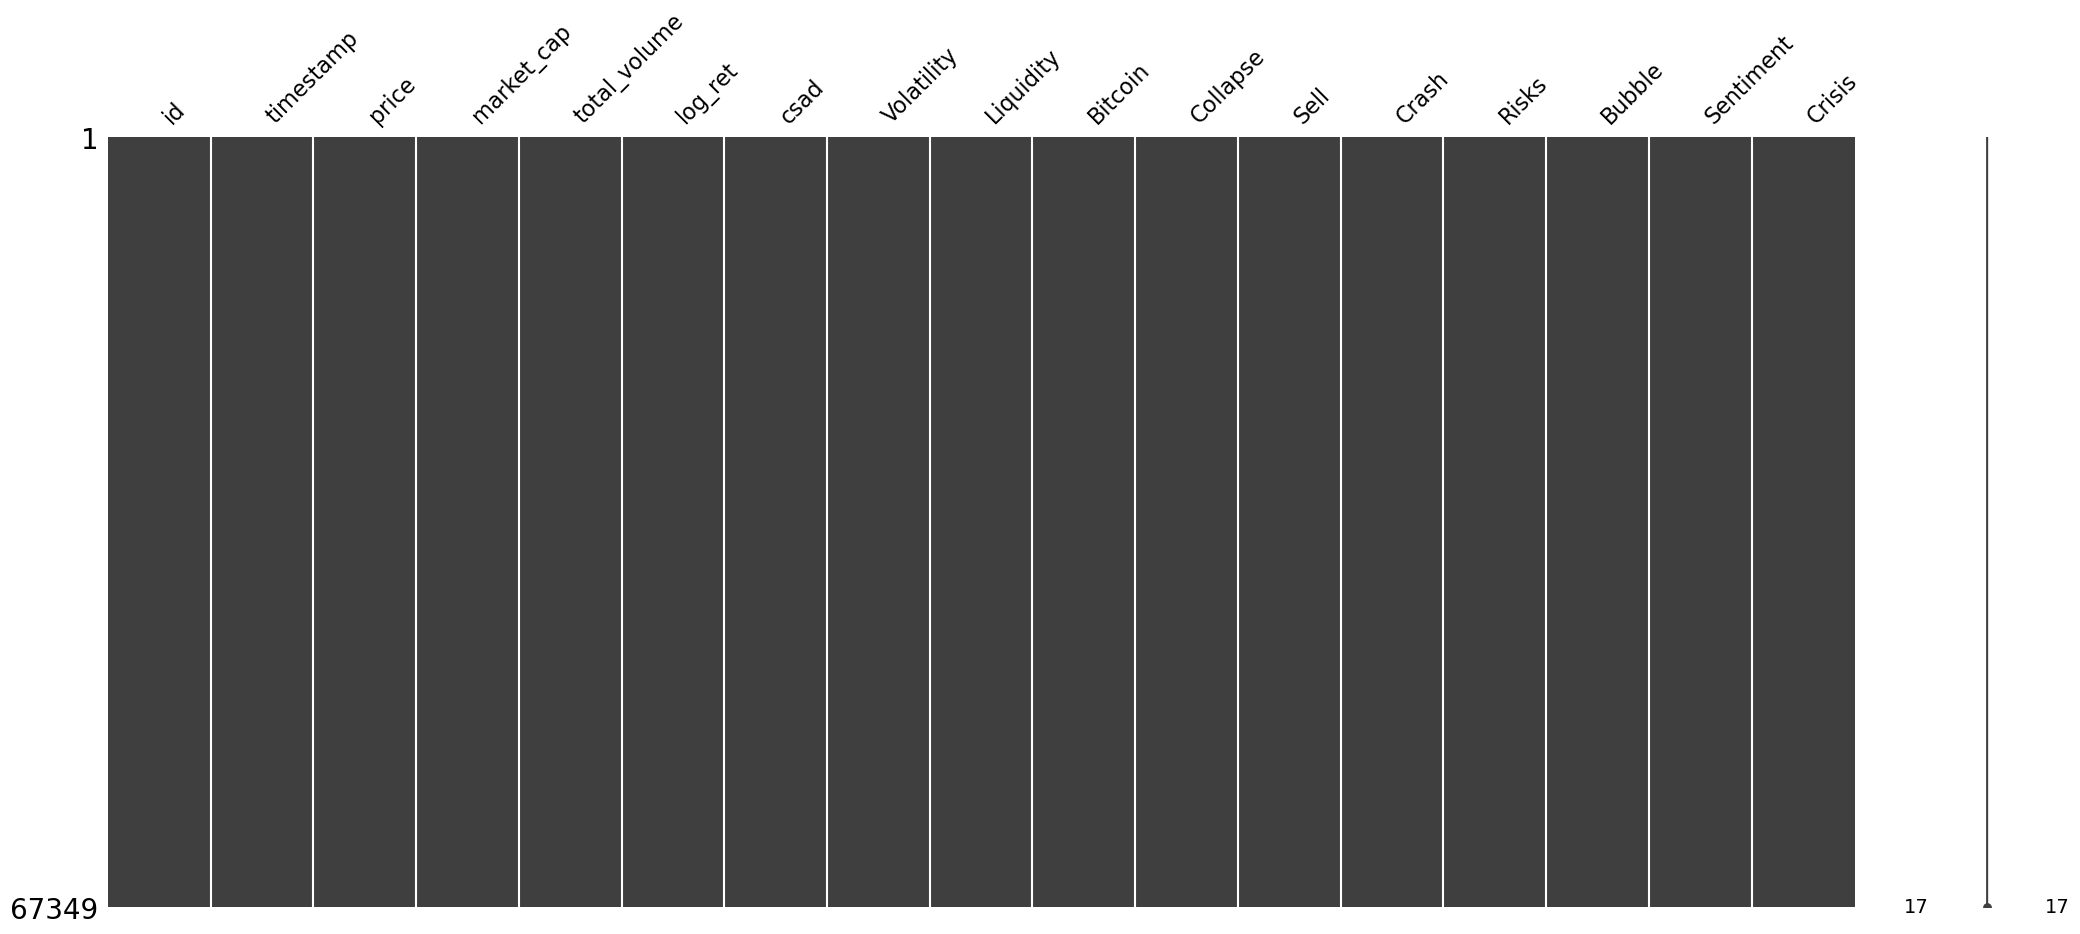

In [18]:
msno.matrix(df)

In [19]:
print(df.head())

        id  timestamp         price    market_cap  total_volume   log_ret  \
0  bitcoin 2021-06-26  31943.136468  5.987030e+11  3.863525e+10  0.000000   
1  bitcoin 2021-06-27  32023.973902  6.002353e+11  3.687311e+10  0.002527   
2  bitcoin 2021-06-28  34607.293274  6.492621e+11  3.433545e+10  0.077580   
3  bitcoin 2021-06-29  34556.842127  6.477412e+11  3.245380e+10 -0.001459   
4  bitcoin 2021-06-30  35968.993668  6.742313e+11  3.512126e+10  0.040052   

       csad  Volatility  Liquidity  Bitcoin  Collapse  Sell  Crash  Risks  \
0  0.000000           0          0       73        83    32     58      4   
1  0.026520           0          1       68        62    33    100      4   
2  0.027467           1          1       70        46    32     84      5   
3  0.033799           1          1       73        36    32     58      5   
4  0.031317           1          1       64        31    31     59      6   

   Bubble  Sentiment  Crisis  
0      48          1      15  
1      44   

### Calculating the daily volatility

In [20]:
df['d_volatility'] = df.groupby('id')['log_ret'].rolling(window=7).std().reset_index(0,drop=True)
df.fillna(0,inplace=True)
df

,id,timestamp,price,market_cap,total_volume,log_ret,csad,Volatility,Liquidity,Bitcoin,Collapse,Sell,Crash,Risks,Bubble,Sentiment,Crisis,d_volatility
0,bitcoin,2021-06-26,31943.136468,5.987030e+11,3.863525e+10,0.000000,0.000000,0,0,73,83,32,58,4,48,1,15,0.000000
1,bitcoin,2021-06-27,32023.973902,6.002353e+11,3.687311e+10,0.002527,0.026520,0,1,68,62,33,100,4,44,2,14,0.000000
2,bitcoin,2021-06-28,34607.293274,6.492621e+11,3.433545e+10,0.077580,0.027467,1,1,70,46,32,84,5,42,2,17,0.000000
3,bitcoin,2021-06-29,34556.842127,6.477412e+11,3.245380e+10,-0.001459,0.033799,1,1,73,36,32,58,5,40,2,16,0.000000
4,bitcoin,2021-06-30,35968.993668,6.742313e+11,3.512126e+10,0.040052,0.031317,1,1,64,31,31,59,6,41,2,17,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67344,pancakeswap-token,2023-06-21,1.407302,2.895687e+08,2.380494e+07,0.009241,0.022358,1,1,79,6,57,61,6,44,2,21,0.021557
67345,pancakeswap-token,2023-06-22,1.434245,2.960873e+08,3.663429e+07,0.018964,0.024535,1,2,79,6,57,60,7,46,2,22,0.018056
67346,pancakeswap-token,2023-06-23,1.407047,2.905783e+08,3.488983e+07,-0.019146,0.017733,1,1,77,6,58,54,6,48,2,21,0.020300
67347,pancakeswap-token,2023-06-24,1.435052,2.957877e+08,3.151829e+07,0.019708,0.025339,1,1,69,6,60,53,5,47,2,19,0.017733


### Calculating the EPU index

##### Loading the GEPU dataset

In [21]:
df_gepu = pd.read_excel('Global_Policy_Uncertainty_Data.xlsx')
df_gepu

,Year,Month,GEPU_current,GEPU_ppp
0,1997,1,77.060617,80.231298
1,1997,2,79.940521,82.645110
2,1997,3,68.917167,67.908716
3,1997,4,73.912911,76.211243
4,1997,5,72.346471,73.165377
...,...,...,...,...
314,2023,2,245.439617,257.524477
315,2023,3,314.085898,325.825862
316,2023,4,237.463008,249.002378
317,2023,5,234.933829,233.199826


#### Allocate month and year numbers separately in the OG df

In [22]:
df['Year'] = df['timestamp'].dt.strftime('%Y')
df['Month'] = df['timestamp'].dt.strftime('%m')
print(df)

                      id  timestamp         price    market_cap  total_volume  \
0                bitcoin 2021-06-26  31943.136468  5.987030e+11  3.863525e+10   
1                bitcoin 2021-06-27  32023.973902  6.002353e+11  3.687311e+10   
2                bitcoin 2021-06-28  34607.293274  6.492621e+11  3.433545e+10   
3                bitcoin 2021-06-29  34556.842127  6.477412e+11  3.245380e+10   
4                bitcoin 2021-06-30  35968.993668  6.742313e+11  3.512126e+10   
...                  ...        ...           ...           ...           ...   
67344  pancakeswap-token 2023-06-21      1.407302  2.895687e+08  2.380494e+07   
67345  pancakeswap-token 2023-06-22      1.434245  2.960873e+08  3.663429e+07   
67346  pancakeswap-token 2023-06-23      1.407047  2.905783e+08  3.488983e+07   
67347  pancakeswap-token 2023-06-24      1.435052  2.957877e+08  3.151829e+07   
67348  pancakeswap-token 2023-06-25      1.422557  3.030034e+08  3.110804e+07   

        log_ret      csad  

In [23]:
df['Month'] = pd.to_datetime(df['Month'], format='%m').dt.month
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

In [24]:
print(df)

                      id  timestamp         price    market_cap  total_volume  \
0                bitcoin 2021-06-26  31943.136468  5.987030e+11  3.863525e+10   
1                bitcoin 2021-06-27  32023.973902  6.002353e+11  3.687311e+10   
2                bitcoin 2021-06-28  34607.293274  6.492621e+11  3.433545e+10   
3                bitcoin 2021-06-29  34556.842127  6.477412e+11  3.245380e+10   
4                bitcoin 2021-06-30  35968.993668  6.742313e+11  3.512126e+10   
...                  ...        ...           ...           ...           ...   
67344  pancakeswap-token 2023-06-21      1.407302  2.895687e+08  2.380494e+07   
67345  pancakeswap-token 2023-06-22      1.434245  2.960873e+08  3.663429e+07   
67346  pancakeswap-token 2023-06-23      1.407047  2.905783e+08  3.488983e+07   
67347  pancakeswap-token 2023-06-24      1.435052  2.957877e+08  3.151829e+07   
67348  pancakeswap-token 2023-06-25      1.422557  3.030034e+08  3.110804e+07   

        log_ret      csad  

In [25]:
df.dtypes

id                      object
timestamp       datetime64[ns]
price                  float64
market_cap             float64
total_volume           float64
log_ret                float64
csad                   float64
Volatility               int32
Liquidity                int32
Bitcoin                  int32
Collapse                 int32
Sell                     int32
Crash                    int32
Risks                    int32
Bubble                   int32
Sentiment                int32
Crisis                   int32
d_volatility           float64
Year                     int64
Month                    int64
dtype: object

In [26]:
print(df.duplicated(subset=['Year', 'Month']).any())
print(df_gepu.duplicated(subset=['Year', 'Month']).any())

True
True


In [27]:

df['year_month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)
df_gepu['year_month'] = df_gepu['Year'].astype(str) + '-' + df_gepu['Month'].astype(str).str.zfill(2)
print(df[df['year_month'].isnull()])
print(df_gepu[df_gepu['year_month'].isnull()])
print(set(df['year_month']) - set(df_gepu['year_month']))
print(set(df_gepu['year_month']) - set(df['year_month']))
df_merged = pd.merge(df, df_gepu, how='outer')
df_merged

Empty DataFrame
Columns: [id, timestamp, price, market_cap, total_volume, log_ret, csad, Volatility, Liquidity, Bitcoin, Collapse, Sell, Crash, Risks, Bubble, Sentiment, Crisis, d_volatility, Year, Month, year_month]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [Year, Month, GEPU_current, GEPU_ppp, year_month]
Index: []
set()
{'2021-04', '2002-08', '2002-09', '1997-07', '2006-06', '2010-03', '2006-04', '2003-09', '2011-02', '2003-07', '2014-09', '1998-01', '2009-06', '2001-01', '2010-05', '1997-01', '2004-09', '2014-07', '1997-05', '2004-11', '2004-10', '1998-12', '2017-10', '2005-08', '2008-06', '2014-11', '1997-11', '2000-08', '2008-10', '1999-09', '2003-05', '2013-04', '2001-09', '1997-03', '2009-01', '2009-02', '2001-08', '1998-08', '1999-01', '2001-12', '2006-08', '2010-01', '2007-02', '2012-07', '2013-02', '2003-04', '2013-07', '2015-03', '2000-05', '2017-11', '1999-03', '2003-10', '2009-04', '2021-01', '2016-03', '1999-02', '2003-12', '1997-10', '2003-06', '2003-02'

,id,timestamp,price,market_cap,total_volume,log_ret,csad,Volatility,Liquidity,Bitcoin,...,Risks,Bubble,Sentiment,Crisis,d_volatility,Year,Month,year_month,GEPU_current,GEPU_ppp
0,bitcoin,2021-06-26,31943.136468,5.987030e+11,3.863525e+10,0.000000,0.000000,0.0,0.0,73.0,...,4.0,48.0,1.0,15.0,0.0,2021,6,2021-06,177.351888,185.916300
1,bitcoin,2021-06-27,32023.973902,6.002353e+11,3.687311e+10,0.002527,0.026520,0.0,1.0,68.0,...,4.0,44.0,2.0,14.0,0.0,2021,6,2021-06,177.351888,185.916300
2,bitcoin,2021-06-28,34607.293274,6.492621e+11,3.433545e+10,0.077580,0.027467,1.0,1.0,70.0,...,5.0,42.0,2.0,17.0,0.0,2021,6,2021-06,177.351888,185.916300
3,bitcoin,2021-06-29,34556.842127,6.477412e+11,3.245380e+10,-0.001459,0.033799,1.0,1.0,73.0,...,5.0,40.0,2.0,16.0,0.0,2021,6,2021-06,177.351888,185.916300
4,bitcoin,2021-06-30,35968.993668,6.742313e+11,3.512126e+10,0.040052,0.031317,1.0,1.0,64.0,...,6.0,41.0,2.0,17.0,0.0,2021,6,2021-06,177.351888,185.916300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70353,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2021,1,2021-01,278.728805,287.191013
70354,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2021,2,2021-02,214.319446,220.678390
70355,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2021,3,2021-03,213.792408,219.667638
70356,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2021,4,2021-04,197.559326,205.927094


### Cleaning the DF

In [28]:
df_merged.drop_duplicates(subset=['id','timestamp'],keep='first',inplace=True)
df_merged.dropna(inplace=True)

In [29]:
df_merged.shape

(67349, 23)

In [30]:
df_merged.id.value_counts()

bitcoin               730
theta-token           730
terra-luna            730
klay-token            730
injective-protocol    730
                     ... 
aptos                 250
frax-ether            205
arbitrum               95
pepe                   69
sui                    54
Name: id, Length: 100, dtype: int64

In [31]:
df_merged.id.unique()

array(['bitcoin', 'ethereum', 'binancecoin', 'ripple', 'staked-ether',
       'cardano', 'dogecoin', 'solana', 'tron', 'litecoin', 'polkadot',
       'matic-network', 'wrapped-bitcoin', 'avalanche-2', 'shiba-inu',
       'uniswap', 'bitcoin-cash', 'leo-token', 'chainlink', 'monero',
       'cosmos', 'okb', 'ethereum-classic', 'stellar',
       'internet-computer', 'filecoin', 'lido-dao', 'hedera-hashgraph',
       'quant-network', 'crypto-com-chain', 'near', 'vechain', 'aave',
       'the-graph', 'blockstack', 'frax', 'algorand', 'elrond-erd-2',
       'fantom', 'the-sandbox', 'eos', 'theta-token', 'tezos',
       'rocket-pool', 'render-token', 'havven', 'decentraland',
       'bitget-token', 'bitcoin-cash-sv', 'axie-infinity',
       'kucoin-shares', 'gala', 'kava', 'neo', 'maker', 'curve-dao-token',
       'gatechain-token', 'flow', 'injective-protocol', 'klay-token',
       'terra-luna', 'compound-ether', 'iota', 'pax-gold',
       'conflux-token', 'tether-gold', 'tokenize-xchange',

#### Converting unique into list

In [32]:
id_list = df_merged.id.unique().tolist()
id_list

['bitcoin',
 'ethereum',
 'binancecoin',
 'ripple',
 'staked-ether',
 'cardano',
 'dogecoin',
 'solana',
 'tron',
 'litecoin',
 'polkadot',
 'matic-network',
 'wrapped-bitcoin',
 'avalanche-2',
 'shiba-inu',
 'uniswap',
 'bitcoin-cash',
 'leo-token',
 'chainlink',
 'monero',
 'cosmos',
 'okb',
 'ethereum-classic',
 'stellar',
 'internet-computer',
 'filecoin',
 'lido-dao',
 'hedera-hashgraph',
 'quant-network',
 'crypto-com-chain',
 'near',
 'vechain',
 'aave',
 'the-graph',
 'blockstack',
 'frax',
 'algorand',
 'elrond-erd-2',
 'fantom',
 'the-sandbox',
 'eos',
 'theta-token',
 'tezos',
 'rocket-pool',
 'render-token',
 'havven',
 'decentraland',
 'bitget-token',
 'bitcoin-cash-sv',
 'axie-infinity',
 'kucoin-shares',
 'gala',
 'kava',
 'neo',
 'maker',
 'curve-dao-token',
 'gatechain-token',
 'flow',
 'injective-protocol',
 'klay-token',
 'terra-luna',
 'compound-ether',
 'iota',
 'pax-gold',
 'conflux-token',
 'tether-gold',
 'tokenize-xchange',
 'casper-network',
 'mina-protocol',


#### Creating a symbol list

In [33]:
cg = CoinGeckoAPI(api_key='CG-T7MX4jd39kacSsJ6ftL6B2S9')
cg.ping()

{'gecko_says': '(V3) To the Moon!'}

In [34]:
btc = cg.get_coin_by_id(id=id_list[0])

In [35]:
btc['symbol']

'btc'

In [36]:
symbols = {}
for crypto in id_list:
    try:
        symbol = cg.get_coin_by_id(id=crypto)
        symbols[crypto] = symbol['symbol']
        time.sleep(0.5)
    except Exception as e:
        print(f"Error fetching symbol for {symbol}: {e}")

print(symbols)

{'bitcoin': 'btc', 'ethereum': 'eth', 'binancecoin': 'bnb', 'ripple': 'xrp', 'staked-ether': 'steth', 'cardano': 'ada', 'dogecoin': 'doge', 'solana': 'sol', 'tron': 'trx', 'litecoin': 'ltc', 'polkadot': 'dot', 'matic-network': 'matic', 'wrapped-bitcoin': 'wbtc', 'avalanche-2': 'avax', 'shiba-inu': 'shib', 'uniswap': 'uni', 'bitcoin-cash': 'bch', 'leo-token': 'leo', 'chainlink': 'link', 'monero': 'xmr', 'cosmos': 'atom', 'okb': 'okb', 'ethereum-classic': 'etc', 'stellar': 'xlm', 'internet-computer': 'icp', 'filecoin': 'fil', 'lido-dao': 'ldo', 'hedera-hashgraph': 'hbar', 'quant-network': 'qnt', 'crypto-com-chain': 'cro', 'near': 'near', 'vechain': 'vet', 'aave': 'aave', 'the-graph': 'grt', 'blockstack': 'stx', 'frax': 'frax', 'algorand': 'algo', 'elrond-erd-2': 'egld', 'fantom': 'ftm', 'the-sandbox': 'sand', 'eos': 'eos', 'theta-token': 'theta', 'tezos': 'xtz', 'rocket-pool': 'rpl', 'render-token': 'rndr', 'havven': 'snx', 'decentraland': 'mana', 'bitget-token': 'bgb', 'bitcoin-cash-sv'

### Yahoo Finance OHLC

In [37]:
tickers = {id: symbol + "-USD" for id, symbol in symbols.items()}

In [38]:
tickers

{'bitcoin': 'btc-USD',
 'ethereum': 'eth-USD',
 'binancecoin': 'bnb-USD',
 'ripple': 'xrp-USD',
 'staked-ether': 'steth-USD',
 'cardano': 'ada-USD',
 'dogecoin': 'doge-USD',
 'solana': 'sol-USD',
 'tron': 'trx-USD',
 'litecoin': 'ltc-USD',
 'polkadot': 'dot-USD',
 'matic-network': 'matic-USD',
 'wrapped-bitcoin': 'wbtc-USD',
 'avalanche-2': 'avax-USD',
 'shiba-inu': 'shib-USD',
 'uniswap': 'uni-USD',
 'bitcoin-cash': 'bch-USD',
 'leo-token': 'leo-USD',
 'chainlink': 'link-USD',
 'monero': 'xmr-USD',
 'cosmos': 'atom-USD',
 'okb': 'okb-USD',
 'ethereum-classic': 'etc-USD',
 'stellar': 'xlm-USD',
 'internet-computer': 'icp-USD',
 'filecoin': 'fil-USD',
 'lido-dao': 'ldo-USD',
 'hedera-hashgraph': 'hbar-USD',
 'quant-network': 'qnt-USD',
 'crypto-com-chain': 'cro-USD',
 'near': 'near-USD',
 'vechain': 'vet-USD',
 'aave': 'aave-USD',
 'the-graph': 'grt-USD',
 'blockstack': 'stx-USD',
 'frax': 'frax-USD',
 'algorand': 'algo-USD',
 'elrond-erd-2': 'egld-USD',
 'fantom': 'ftm-USD',
 'the-sand

In [39]:
btc_yh = yf.download(tickers = tickers['bitcoin'], period='max',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [40]:
btc_yh

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-06-30,30441.353516,31256.863281,29600.275391,30477.251953,30477.251953,26387306197
2023-07-01,30471.847656,30641.289062,30328.865234,30590.078125,30590.078125,9086606733
2023-07-02,30587.269531,30766.140625,30264.019531,30620.769531,30620.769531,10533418042


In [41]:
yh_dfs = []
# Take each symbol
for id, tick in tickers.items():
    try:
        yh = yf.download(tickers = tick,period='36mo',interval='1d')
        # TODO Add the id Column
        yh['id'] = id
        yh_dfs.append(yh)
        print('Success!')
    except Exception as e:
        print(f'Error {tick}')

[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 compl


1 Failed download:
['CETH-USD']: Exception('%ticker%: No data found, symbol may be delisted')



Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 of 1 completed
Success!
[*********************100%***********************]  1 

In [42]:
yh_df = pd.concat(yh_dfs,ignore_index=False)
yh_df.reset_index(inplace=True)
print(yh_df)

            Date         Open         High          Low        Close  \
0     2020-07-04  9084.233398  9183.295898  9053.629883  9132.488281   
1     2020-07-05  9126.090820  9162.183594  8977.015625  9073.942383   
2     2020-07-06  9072.849609  9375.474609  9058.664062  9375.474609   
3     2020-07-07  9349.161133  9360.617188  9201.815430  9252.277344   
4     2020-07-08  9253.020508  9450.335938  9249.500000  9428.333008   
...          ...          ...          ...          ...          ...   
95644 2023-06-30     0.005426     0.005616     0.005409     0.005595   
95645 2023-07-01     0.005595     0.005818     0.005595     0.005794   
95646 2023-07-02     0.005794     0.005804     0.005692     0.005760   
95647 2023-07-03     0.005763     0.005884     0.005725     0.005735   
95648 2023-07-04     0.005734     0.005745     0.005702     0.005723   

         Adj Close        Volume       id  
0      9132.488281  1.229053e+10  bitcoin  
1      9073.942383  1.290341e+10  bitcoin  
2  

### Rename Date with Timestamp

In [44]:
yh_df = yh_df.rename(columns={'Date':'timestamp'})

### Merging final DF

In [45]:
df_final = pd.merge(df_merged,yh_df,on=['timestamp','id'],how='inner')
df_final

,id,timestamp,price,market_cap,total_volume,log_ret,csad,Volatility,Liquidity,Bitcoin,...,Month,year_month,GEPU_current,GEPU_ppp,Open,High,Low,Close,Adj Close,Volume
0,bitcoin,2021-06-26,31943.136468,5.987030e+11,3.863525e+10,0.000000,0.000000,0.0,0.0,73.0,...,6,2021-06,177.351888,185.916300,31594.664062,32637.587891,30184.501953,32186.277344,32186.277344,3.858539e+10
1,bitcoin,2021-06-27,32023.973902,6.002353e+11,3.687311e+10,0.002527,0.026520,0.0,1.0,68.0,...,6,2021-06,177.351888,185.916300,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,3.551164e+10
2,bitcoin,2021-06-28,34607.293274,6.492621e+11,3.433545e+10,0.077580,0.027467,1.0,1.0,70.0,...,6,2021-06,177.351888,185.916300,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,3.389252e+10
3,bitcoin,2021-06-29,34556.842127,6.477412e+11,3.245380e+10,-0.001459,0.033799,1.0,1.0,73.0,...,6,2021-06,177.351888,185.916300,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,3.790146e+10
4,bitcoin,2021-06-30,35968.993668,6.742313e+11,3.512126e+10,0.040052,0.031317,1.0,1.0,64.0,...,6,2021-06,177.351888,185.916300,35908.386719,36074.757812,34086.152344,35040.835938,35040.835938,3.405904e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65451,pancakeswap-token,2023-06-21,1.407302,2.895687e+08,2.380494e+07,0.009241,0.022358,1.0,1.0,79.0,...,6,2023-06,234.933829,233.199826,1.409517,1.442933,1.403805,1.432450,1.432450,3.103965e+07
65452,pancakeswap-token,2023-06-22,1.434245,2.960873e+08,3.663429e+07,0.018964,0.024535,1.0,2.0,79.0,...,6,2023-06,234.933829,233.199826,1.432334,1.475298,1.404411,1.408657,1.408657,2.855945e+07
65453,pancakeswap-token,2023-06-23,1.407047,2.905783e+08,3.488983e+07,-0.019146,0.017733,1.0,1.0,77.0,...,6,2023-06,234.933829,233.199826,1.408780,1.449615,1.404394,1.434266,1.434266,2.495113e+07
65454,pancakeswap-token,2023-06-24,1.435052,2.957877e+08,3.151829e+07,0.019708,0.025339,1.0,1.0,69.0,...,6,2023-06,234.933829,233.199826,1.434368,1.455681,1.393096,1.420914,1.420914,2.499107e+07


In [46]:
df_final.drop_duplicates(subset=['id','timestamp'],keep='first',inplace=True)
df_final.dropna(inplace=True)
df_final.timestamp.value_counts()

2023-06-25    94
2023-04-08    94
2023-02-11    94
2023-02-12    94
2023-02-13    94
              ..
2021-07-04    79
2021-07-05    79
2021-07-07    79
2021-06-27    79
2021-06-26    79
Name: timestamp, Length: 730, dtype: int64

In [47]:
df_final.id.value_counts()

bitcoin               730
ethereum              730
injective-protocol    730
flow                  730
gatechain-token       730
                     ... 
immutable-x           261
aptos                 250
frax-ether            165
arbitrum               95
sui                    54
Name: id, Length: 98, dtype: int64

In [48]:
df_final.shape

(65456, 29)

<Axes: >

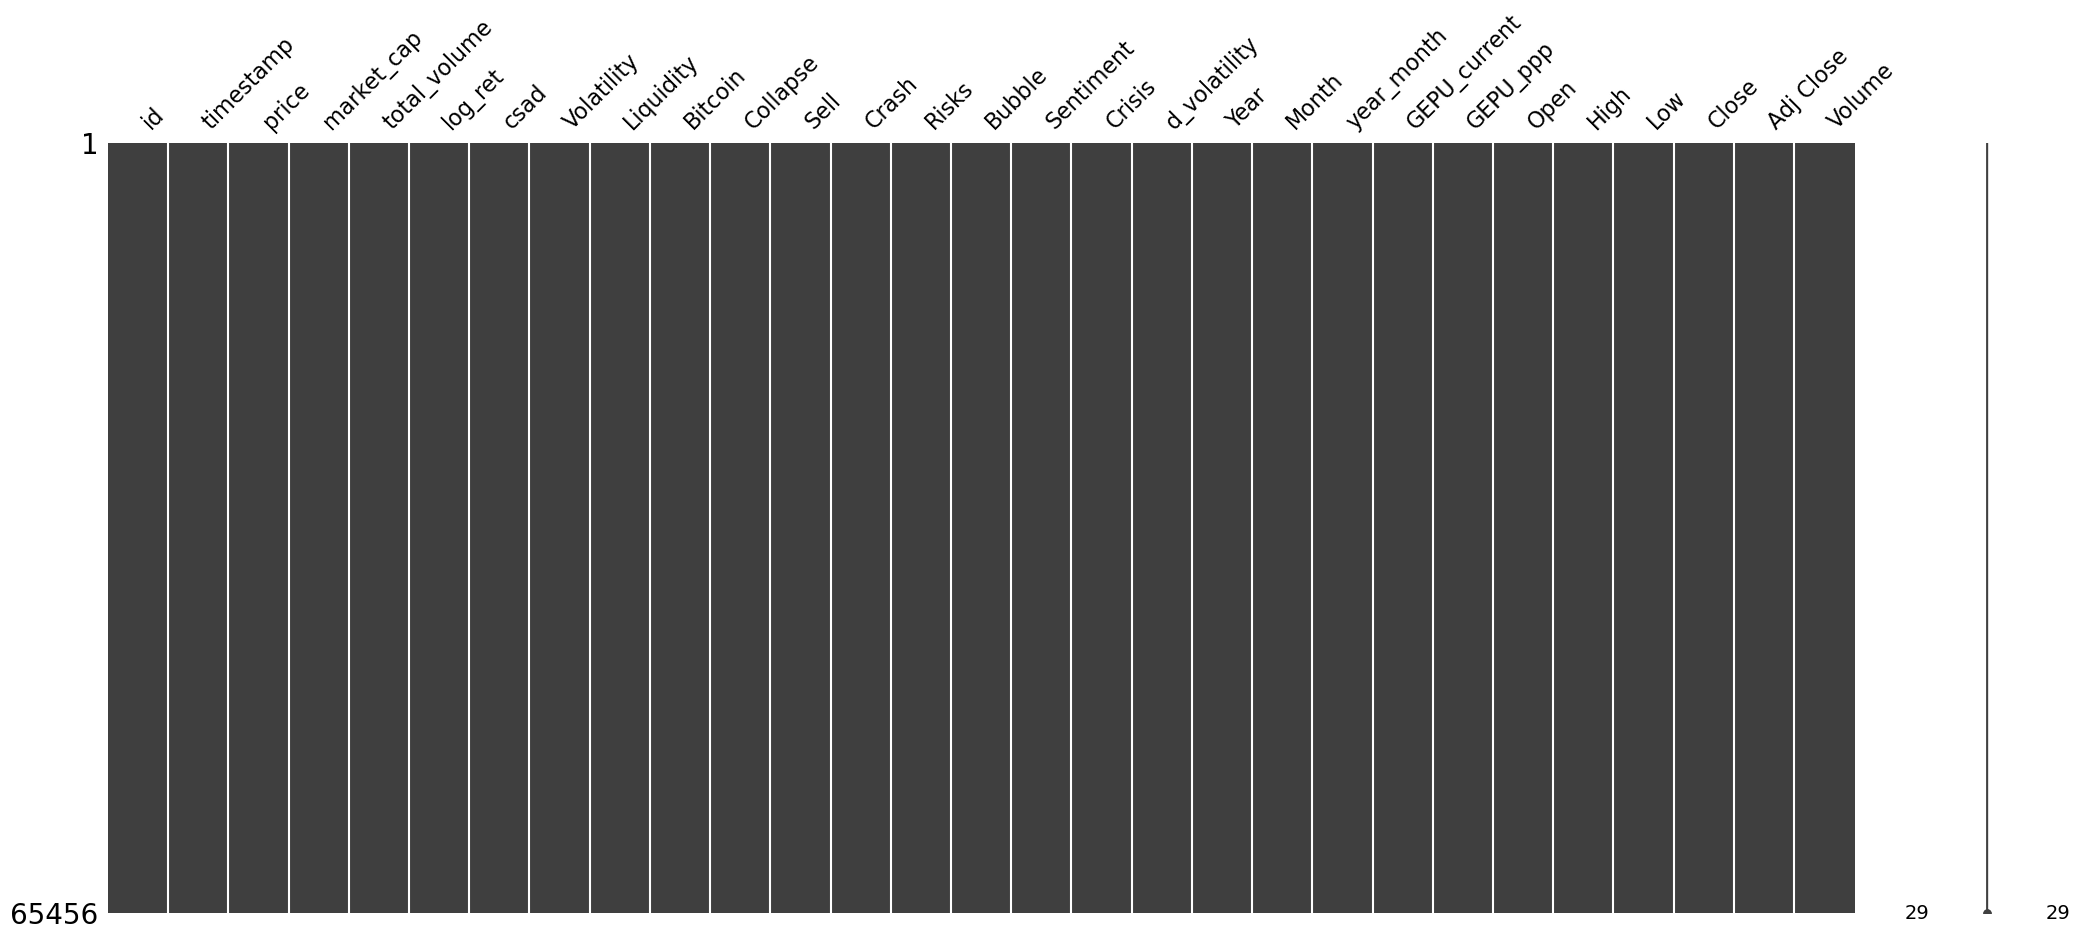

In [49]:
msno.matrix(df_final)

In [50]:
df_final.to_csv('crypto_data.csv',index=False)